# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

There is a positive relationship between volume and height: taller trees generally have
a larger volume. However, the relationship is not very strong. Trees with similar heights
can still have quite different volumes, so height alone does not explain volume very well.

**(b) Describe the relationship between volume and diameter of these trees.**

There is a strong positive relationship between volume and diameter. As the diameter of
the tree increases, the volume increases clearly and more consistently. The points follow
a much clearer linear trend than in the height plot.

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

Diameter would be the better variable for predicting wood volume using a simple linear
regression model. The relationship between diameter and volume is stronger and more linear,
and there is less scatter in the data compared to height.

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [1]:
import pandas as pd

utils = pd.read_csv("data/utils.csv")
utils.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


In [3]:
print(utils.head())

  Month  Average Bill  Average Monthly Temperature
0   Jan         148.5                           38
1   Feb         136.5                           45
2   Mar         117.0                           49
3   Apr          91.5                           57
4   May          82.5                           69


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

The average utility bill makes the most sense as the response variable, because it is the
outcome we want to explain or predict. Average monthly temperature influences how much
energy a household uses, but the utility bill does not influence the temperature.

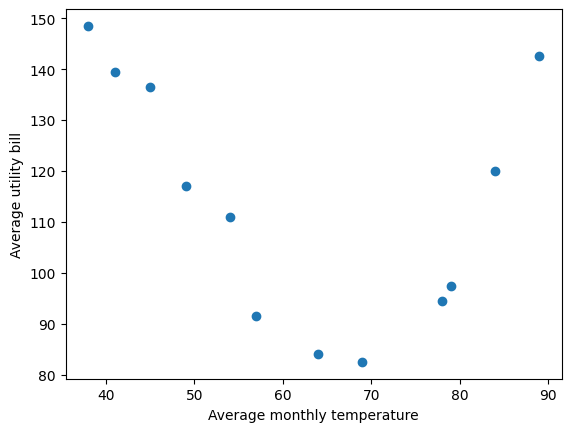

In [4]:
import matplotlib.pyplot as plt

plt.scatter(
    utils["Average Monthly Temperature"],
    utils["Average Bill"]
)
plt.xlabel("Average monthly temperature")
plt.ylabel("Average utility bill")
plt.show()

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 
The relationship is non-linear. Bills are higher at low and high temperatures and
lowest at moderate temperatures, forming a U-shaped pattern.

**(d) Train a simple linear regression model using scikit-learn**

In [5]:
from sklearn.linear_model import LinearRegression

# Define feature and target
X = utils[["Average Monthly Temperature"]]
y = utils["Average Bill"]

# Train the model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**(e) Calculate and interpret the value of $R^2$.**  

In [7]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
r2

0.12406543648691692

The R² value shows how much of the variation in average utility bills can be explained
by average monthly temperature.

An R² of this size means that temperature explains some of the changes in the bill,
but not all of it. Other factors, such as home insulation, energy prices, or household
behavior, also affect utility costs.

**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [8]:
intercept = model.intercept_
slope = model.coef_[0]

intercept, slope

(np.float64(143.62280506779285), np.float64(-0.4798844187597245))

The intercept is the estimated utility bill when the average monthly temperature is 0
degrees. This situation is not very realistic, but the intercept is needed to define
the regression line.

The slope shows how the utility bill changes when the temperature increases by one
degree. Because the slope is negative, the bill generally decreases as temperatures
rise, mainly due to lower heating costs.

**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [9]:
model.predict(pd.DataFrame({"Average Monthly Temperature": [120]}))

array([86.03667482])

The predicted utility bill at 120 degrees is not reasonable. This value is far outside
the temperature range in the dataset, so the model is being asked to extrapolate.

Linear regression assumes the same straight-line relationship continues, which is
unlikely at extreme temperatures. As a result, this prediction should not be trusted.